### Importing Libraries

In [2]:
import os
import numpy as np
import tifffile as tiff
import scipy.signal as signal
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import datetime


## Combining Image Stacks


In [3]:
data_loc = "./data"
filenames = ["Alexa 488", "Alexa 647", "HOECHST 33342"]
dirs = os.listdir(data_loc)
all_tiffs = {}
for i, dir in enumerate(dirs):
    for name in filenames:
        location = os.path.join(data_loc, dir)
        tiffs = os.listdir(location)
        images_names = [i for i in tiffs if name in i]
        images = np.array([np.array(tiff.imread(os.path.join(location, img))) for img in images_names])
        if images.shape[0] == 0:
            continue
        res = np.max(images, axis=0)
        save_path = "./saves/" + f"{name}_{i}.tiff"
        if name not in all_tiffs:
            all_tiffs[name] = []
        all_tiffs[name].append(res)
        tiff.imsave(save_path , res)



/var/folders/g0/0n9txdv108ggmm56dgdmw2bw0000gn/T/ipykernel_2758/1297618586.py:18: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(save_path , res)


In [4]:
def cross_image(im1, im2):
    """Cross-correlate two images"""
    im1 = im1 - np.mean(im1)
    im2 = im2 - np.mean(im2)
    return signal.fftconvolve(im1, im2[::-1, ::-1], mode="same")

Image 1 center (540, 540)
Brightest pixel in 1 and 2 (547, 530)
Difference between 1 and 2 (7, -10)
Difference between 1 and 3 (0, 0)


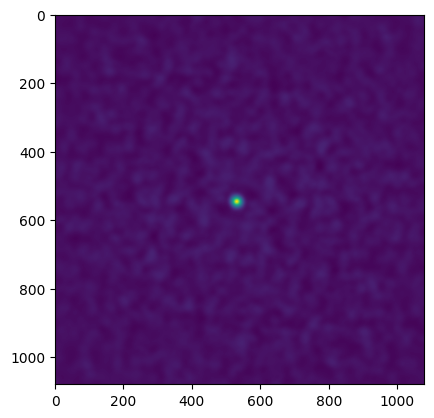

In [24]:
img1 = tiff.imread("./saves/HOECHST 33342_0.tiff")
img2 = tiff.imread("./saves/HOECHST 33342_1.tiff")
img3 = tiff.imread("./saves/HOECHST 33342_2.tiff")

img1_size = img1.shape
img2_size = img2.shape

img1_center = (img1_size[0] // 2, img1_size[1] // 2)
print("Image 1 center", img1_center)

cross_12 = cross_image(img1, img2)
brightest_12 = np.unravel_index(np.argmax(cross_12), cross_12.shape)
print("Brightest pixel in 1 and 2", brightest_12)
diff_12 = (brightest_12[0] - img1_center[0], brightest_12[1] - img1_center[1])
print("Difference between 1 and 2", diff_12)

cross_13 = cross_image(img1, img3)
brightest_13 = np.unravel_index(np.argmax(cross_13), cross_13.shape)
diff_13 = (brightest_13[0] - img1_center[0], brightest_13[1] - img1_center[1])
print("Difference between 1 and 3", diff_13)

plt.imshow(cross_12)
plt.show()


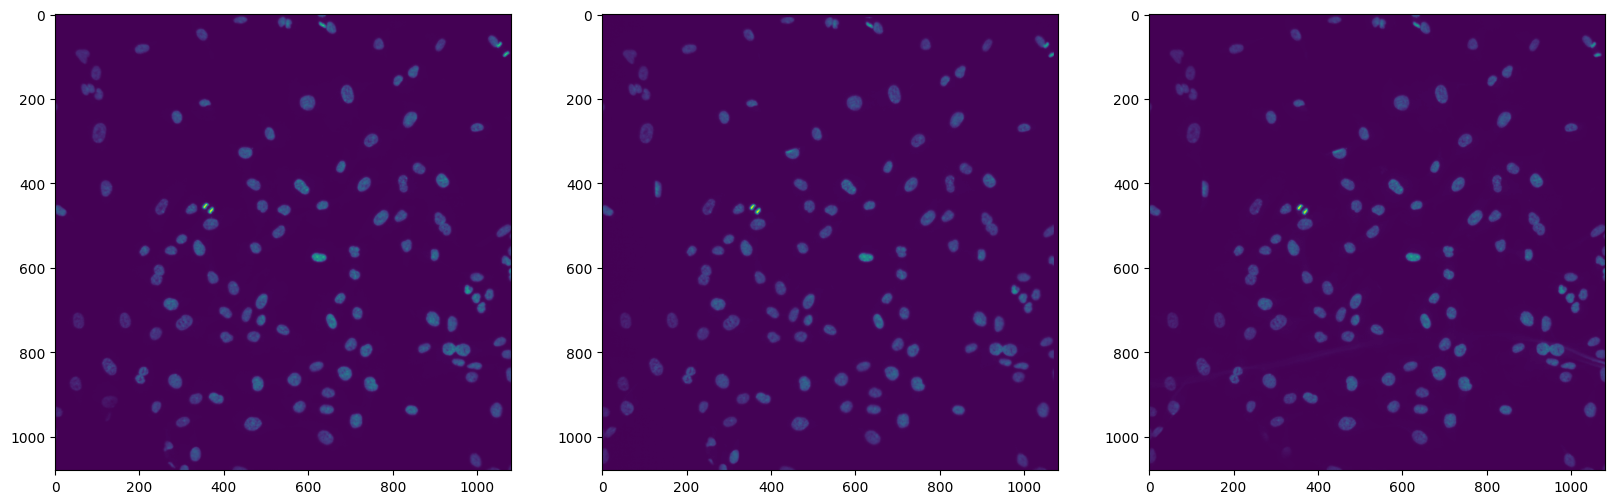

In [6]:
img2_shift = ndimage.shift(img2, diff_12)
img3_shift = ndimage.shift(img3, diff_13)

plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2_shift)
plt.subplot(1, 3, 3)
plt.imshow(img3_shift)
plt.show()

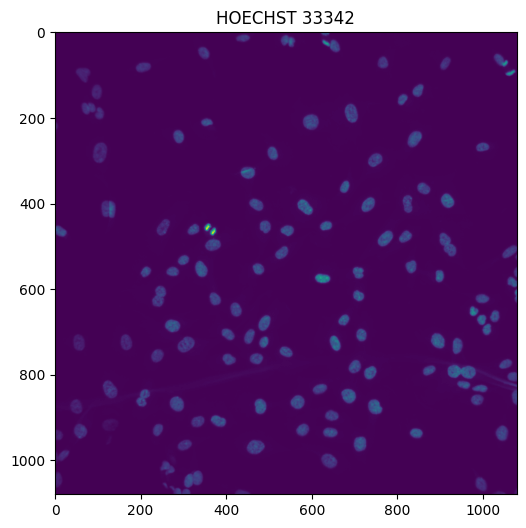

/var/folders/g0/0n9txdv108ggmm56dgdmw2bw0000gn/T/ipykernel_2758/1685068582.py:7: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave("./saves/HOECHST 33342_max.tiff", hoechst_max)


In [7]:
hoechst_all = np.stack([img1, img2_shift, img3_shift])
hoechst_max = np.max(hoechst_all, axis=0)   
plt.figure(figsize=(6, 6))
plt.imshow(hoechst_max) 
plt.title("HOECHST 33342")
plt.show()
tiff.imsave("./saves/HOECHST 33342_max.tiff", hoechst_max)

/var/folders/g0/0n9txdv108ggmm56dgdmw2bw0000gn/T/ipykernel_2758/4252136960.py:10: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave("./saves/Alexa 488_max.tiff", alexa488_max)


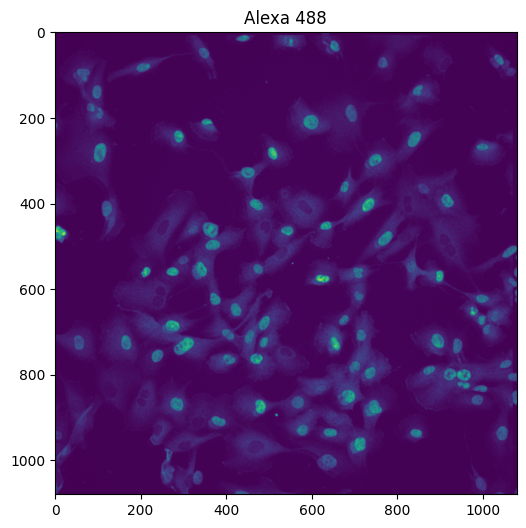

In [8]:
alexa488_all = all_tiffs["Alexa 488"]
shifted = [alexa488_all[0]]
for i, a in enumerate(alexa488_all):
    if i == 0:
        continue
    s = ndimage.shift(a, diff_12)
    shifted.append(s)

alexa488_max = np.max(np.stack(shifted), axis=0)
tiff.imsave("./saves/Alexa 488_max.tiff", alexa488_max)
plt.figure(figsize=(6, 6))
plt.imshow(alexa488_max)
plt.title("Alexa 488")
plt.show()

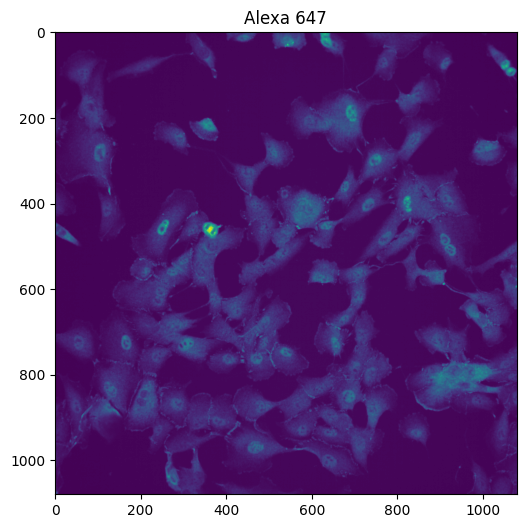

/var/folders/g0/0n9txdv108ggmm56dgdmw2bw0000gn/T/ipykernel_2758/313337846.py:14: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave("./saves/Alexa 647_max.tiff", alexa647_max)


In [9]:
alexa647_all = all_tiffs["Alexa 647"]
shifted = [alexa647_all[0]]
for i, a in enumerate(alexa647_all):
    if i == 0:
        continue
    s = ndimage.shift(a, diff_13)
    shifted.append(s)

alexa647_max = np.max(np.stack(shifted), axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(alexa647_max)
plt.title("Alexa 647")
plt.show()
tiff.imsave("./saves/Alexa 647_max.tiff", alexa647_max)

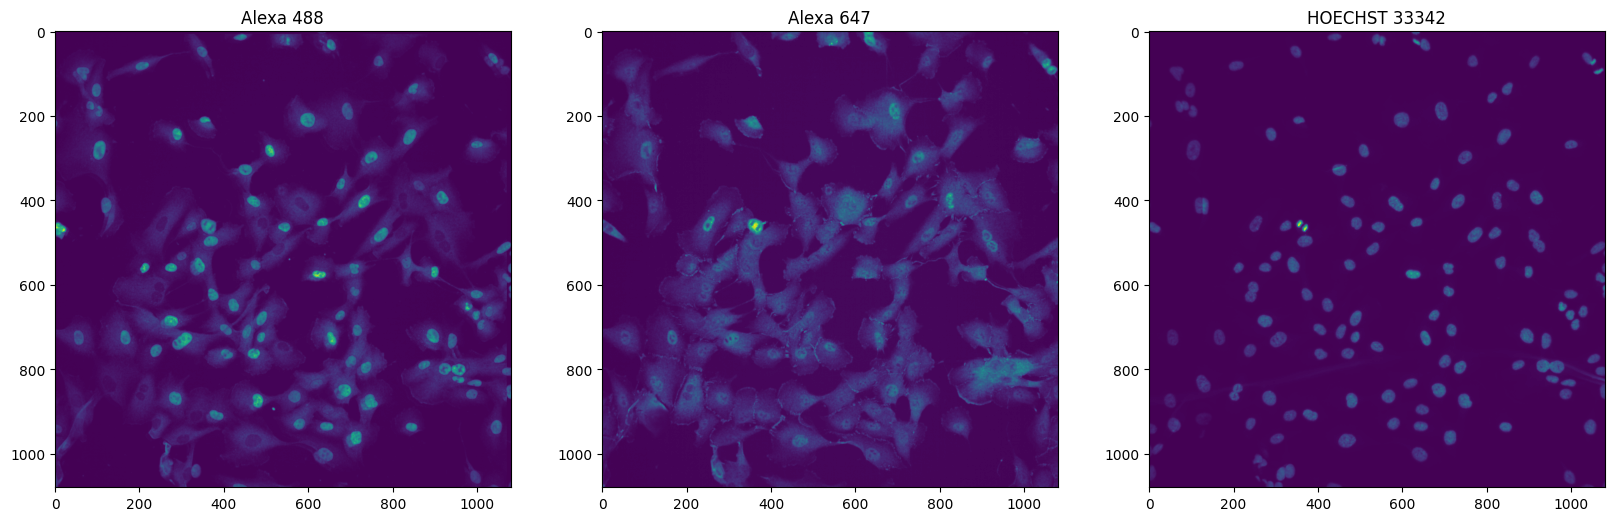

In [10]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(alexa488_max)
plt.title("Alexa 488")
plt.subplot(1, 3, 2)
plt.imshow(alexa647_max)
plt.title("Alexa 647")
plt.subplot(1, 3, 3)
plt.imshow(hoechst_max)
plt.title("HOECHST 33342")
plt.show()

In [11]:
d = {"hello" : 123}

for key in d:
    print(key)
    print(d[key])

hello
123


## Benchmarks

In [41]:
nums = [
    0.11043596267700195,
    0.08357810974121094,
    0.08507585525512695,
    0.08513998985290527,
    0.0842292308807373 
]

nums_updated = [
    0.004021883010864258,
    0.0015270709991455078,
    0.0013587474822998047,
    0.0013439655303955078,
    0.0014190673828125
]

mean_time = np.mean(nums)
mean_time_updated = np.mean(nums_updated)

total_overlay_time = 0.453122615814209
total_overlay_time_updated = 0.01918482780456543

print("Mean time to shift (non-optimised)", mean_time)
print("Mean time to shift (optimised)", mean_time_updated)

print("Code exec time (non-optimised)", total_overlay_time - np.sum(nums))
print("Code exec time (optimised)", total_overlay_time_updated - np.sum(nums_updated))

stack_time = 0.12061810493469238 # time to stack images in 3 folders
stack_time_updated = 0.1479039192199707

stack_time_per_folder = stack_time / 3
stack_time_per_folder_updated = stack_time_updated / 3
print("Time to stack per folder (non-optimised)", stack_time_per_folder)
print("Time to stack per folder (optimised)", stack_time_per_folder_updated)

TIFF_SIZE_BITS = 12800000 # 1.6MB in bits
TIFF_SIZE_BYTES = TIFF_SIZE_BITS / 8
TERRA_BYTES = 1024 * 1024 * 1024 * 1024
num_of_images_in_terra = TERRA_BYTES // TIFF_SIZE_BYTES
print("Number of images in 1 terra", num_of_images_in_terra)

t = str(datetime.timedelta(seconds=num_of_images_in_terra * mean_time))
t_updated = str(datetime.timedelta(seconds=num_of_images_in_terra * mean_time_updated))
print("Time for a TB of images (shifting only) - non-optimised", t)
print("Time for a TB of images (shifting only) - optimised", t_updated)

Mean time to shift (non-optimised) 0.08969182968139648
Mean time to shift (optimised) 0.0019341468811035155
Code exec time (non-optimised) 0.0046634674072265625
Code exec time (optimised) 0.009514093399047852
Time to stack per folder (non-optimised) 0.0402060349782308
Time to stack per folder (optimised) 0.0493013064066569
Number of images in 1 terra 687194.0
Time for a TB of images (shifting only) - non-optimised 17:07:15.687206
Time for a TB of images (shifting only) - optimised 0:22:09.134132


In [14]:
import cv2 as cv
import numpy as np

In [33]:
img1 = tiff.imread("./data/Rnd1_D3/HOECHST 33342_collated.tiff")
img2 = tiff.imread("./data/Rnd2_D3/HOECHST 33342_collated.tiff")
x, y = diff_12
print(f"x: {x}, y:{y}")
transform = np.float32([[1,0, -x], [0,1, -y]])

print(img2)
print()
print(transform)

x: 7, y:-10
[[115 110 108 ... 119 117 105]
 [110 111 101 ... 117 124 117]
 [114 110 107 ... 113 118 120]
 ...
 [147 167 199 ... 142 167 221]
 [159 171 189 ... 142 168 209]
 [171 174 187 ... 142 161 179]]

[[ 1.  0. -7.]
 [ 0.  1. 10.]]


Img diff: 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 6  6 43 ...  0  0  0]
 [27 30 51 ...  0  0  0]
 [ 4 31 54 ...  0  0  0]]


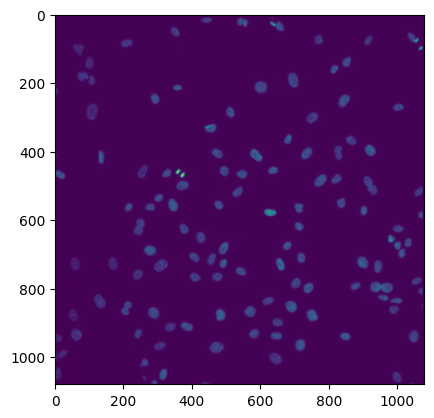

In [37]:
shifted_cv = cv.warpAffine(img2, transform, (img2.shape[0], img2.shape[1]))
img2_shift = ndimage.shift(img2, diff_12)

diff = (shifted_cv - img2_shift)
print("Img diff: \n", diff)
plt.imshow(shifted_cv)
plt.show()

In [38]:
both = np.max(np.stack([shifted_cv, img1]), axis=0)

both

array([[ 104,  106,  117, ...,  122,  111,  107],
       [ 106,  111,  111, ...,  119,  120,  112],
       [ 118,  107,  114, ...,  117,  117,  121],
       ...,
       [ 196,  189,  203, ..., 2173, 2295, 2437],
       [ 208,  199,  201, ..., 2225, 2251, 2288],
       [ 200,  201,  206, ..., 2336, 2402, 2343]], dtype=uint16)

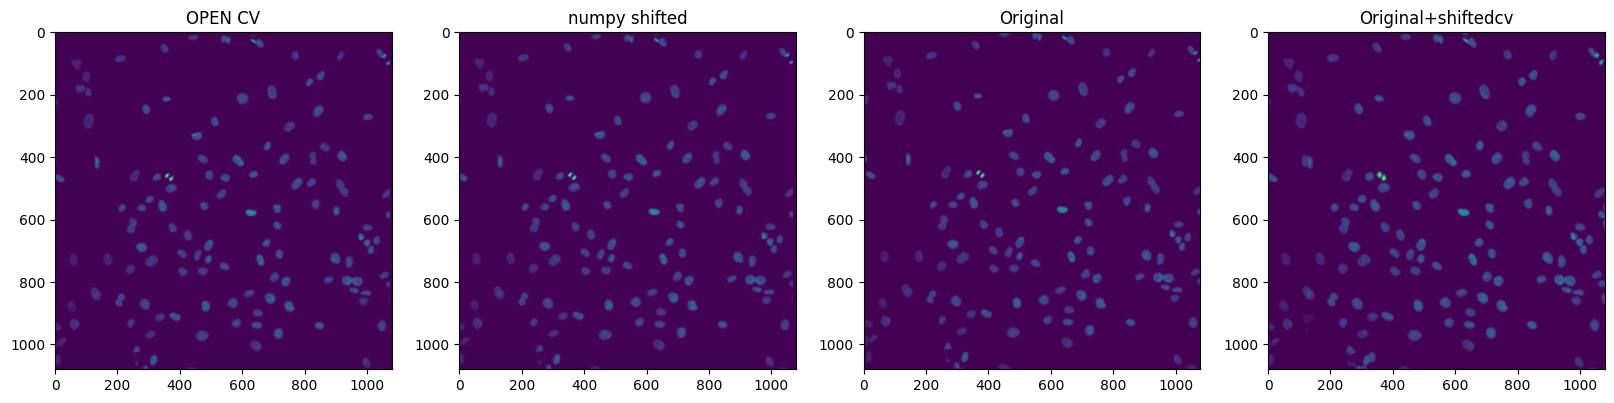

In [39]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(shifted_cv)
plt.title("OPEN CV")

plt.subplot(1, 4, 2)
plt.imshow(img2_shift)
plt.title("numpy shifted")

plt.subplot(1,4,3)
plt.imshow(img2)
plt.title("Original")

plt.subplot(1,4,4)
plt.imshow(both)
plt.title("Original+shiftedcv")
plt.show()